###### Base Model EDA
Before performing any analysis, we need to clean and transform the data. To do this, we drop the redundant variables in the dataset and use L1 for train, test and split. Moreover, some variables need to be normalized using StandardScaler. Once the aforementioned steps have been carried out, we can proceed. However, after executing each model, we need to determine the evaluation metric to be used. 
Using GridSearch for the best choice of hyperparameters, run different algorithms:

- Logistic Regression
- K-NN 
- Decision Tree Classifie
- SVM Classification 
- Neural Network

###### Algroithms considered - 
- Decision Tree: No need to do feature selection for DT as it automatically adjusts for outliers and picks the most relevant features 
- Logistic Regression: Drop variables that are highly vorrelated and then use the rest for L1 which will conduct feature selection automatically 
- KNN: Two way of going about KNN. i)Use Logistic regression's best output with the most relevant features selected. ii) execute one iteration with all features included
- Neural Network: Same concept as knn - use random forest's best output and iterate again with max_features

In [15]:
import pandas as pd
from pandas import DataFrame
import numpy as np

path = 'C:/Users/Batool Fatima/Desktop/MSBA Fall 2019/MSBA 6420 - Predictive Analytics/'
filecheck = pd.read_csv(path + 'spambase.names',skiprows =32, names = ['name','val1','val2'])
colnames = filecheck.name.str.split(':',expand = True)[0]
colnames = colnames.append(pd.Series('spam'))
spam_data= pd.read_csv(path + "spambase.data", header = None, names = colnames)

In [16]:
spam_data.shape

(4601, 58)

In [18]:
spam_data['spam'].value_counts()/spam_data.shape[0]

## we have seen from the documentation that there are no missing values

0    0.605955
1    0.394045
Name: spam, dtype: float64

In [78]:
spam_data.corr().head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920


In [20]:
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings; warnings.simplefilter('ignore')
## Plotting Learning Curves
from sklearn.model_selection import learning_curve


In [22]:
spam_data_y = spam_data.iloc[:,57].values
spam_data_x = spam_data.iloc[:,0:57].values
x_train,x_test,y_train,y_test = train_test_split(spam_data_x, spam_data_y, test_size = 0.2, 
                                                 random_state = 123,stratify = spam_data_y)
normalise = StandardScaler()
normalise.fit(x_train)
x_train = normalise.transform(x_train)
x_test = normalise.transform(x_test)

Decision Tree

In [62]:
# Decision Tree
depth={"max_depth":[1,10,20,30,40,50],
       "min_samples_leaf" : [10,20,30]}       

tree=DecisionTreeClassifier()

grid_dt=GridSearchCV(tree,param_grid=depth , cv=4, scoring= make_scorer(roc_auc_score))
grid_dt.fit(x_train,y_train) 
dt_result =pd.DataFrame(grid_dt.cv_results_)
grid_dt.best_params_

{'max_depth': 30, 'min_samples_leaf': 10}

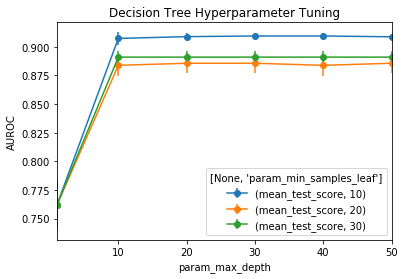

In [63]:
plot_results( grid_dt ,par_1 = "max_depth",par_2 = "min_samples_leaf", 
             title = "Decision Tree Hyperparameter Tuning",
             y_lab= "AUROC")

In [65]:
dec_tree = DecisionTreeClassifier(**grid_dt.best_params_)
dec_tree.fit(x_train, y_train)
y_pred_dt = dec_tree.predict_proba(x_test)[:,1]

In [67]:
roc_auc_score(y_test,y_pred_dt)

0.9438717576547491

Logistic Regression

In [26]:
spam_log = spam_data.copy()
spam_log.drop(columns = ['word_freq_direct','word_freq_415','word_freq_telnet'], inplace = True)
spam_data_y = spam_log.iloc[:,54].values
spam_data_x = spam_log.iloc[:,0:54].values
x_train,x_test,y_train,y_test = train_test_split(spam_data_x, spam_data_y, test_size = 0.2, 
                                                 random_state = 123,stratify = spam_data_y)
normalise = StandardScaler()
normalise.fit(x_train)
x_train = normalise.transform(x_train)
x_test = normalise.transform(x_test)

In [27]:
# L1 penalty 
spam_log.shape

(4601, 55)

In [28]:
c_vals={"C":[0.001,0.01,1,10]}       

log=LogisticRegression(penalty = 'l1')

grid_log=GridSearchCV(log,param_grid=c_vals , cv=4, scoring= make_scorer(roc_auc_score))
grid_log.fit(x_train,y_train) 
log_result =pd.DataFrame(grid_log.cv_results_)
grid_log.best_params_

{'C': 10}

In [34]:
finallog = LogisticRegression(**grid_log.best_params_)
finallog.fit(x_train, y_train)
y_pred_finallog = finallog.predict_proba(x_test)[:,1]

In [58]:
roc_auc_score(y_test,y_pred_finallog)

0.9731824599859791

In [31]:
finallog.coef_

array([[-9.14489467e-02, -1.93242408e-01,  7.94637540e-02,
         1.72430900e+00,  2.93352933e-01,  2.96204253e-01,
         9.22593129e-01,  2.52152838e-01,  1.18637553e-01,
         8.63417048e-02, -3.33731144e-02, -1.28630659e-01,
         6.71030238e-03,  4.15149189e-02,  5.07494570e-01,
         1.03836707e+00,  4.23268528e-01,  5.47498770e-02,
         1.50018119e-01,  8.85223949e-01,  2.64008068e-01,
         2.49867934e-01,  6.78304047e-01,  1.94517651e-01,
        -3.48991345e+00, -7.23968772e-01, -1.16195260e+01,
         1.51896125e-01, -1.41802125e+00, -1.19561015e-01,
         2.27747527e-01, -4.38356288e-01, -9.61103385e-01,
         4.65424794e-01, -1.37245721e-02, -1.66297890e-01,
        -2.85337155e-01, -4.47885730e+00, -1.56707272e+00,
        -2.99338540e-01, -1.38194623e+00, -7.77878831e-01,
        -1.31228070e+00, -2.62418618e-01, -8.08004648e-01,
        -3.72175149e-01, -7.62283600e-02, -7.50454999e-02,
         2.62037116e-01,  1.07872927e+00,  1.38664037e+0

In [35]:
y_pred_finallog

array([1.59813842e-09, 9.99906921e-01, 8.31614578e-01, 8.12170672e-02,
       1.19538972e-04, 1.21617690e-30, 1.31069221e-03, 1.86921113e-01,
       1.83355176e-01, 1.07247793e-02, 2.84184733e-01, 3.84772741e-03,
       9.69459841e-01, 9.98661913e-01, 2.46365854e-07, 9.99971552e-01,
       9.76238363e-01, 9.80813227e-01, 4.00419144e-03, 9.99911535e-01,
       1.44754487e-09, 9.89195629e-01, 3.61600612e-13, 8.07394147e-05,
       2.47042315e-22, 2.34437216e-09, 1.57947757e-01, 9.92075863e-01,
       4.88572122e-01, 9.99999858e-01, 1.82314638e-02, 1.57249094e-05,
       7.82530244e-01, 8.30550397e-01, 9.41411596e-01, 8.58242398e-01,
       1.21617690e-30, 2.89846980e-01, 1.37106620e-01, 9.99998961e-01,
       7.23725249e-01, 9.89447057e-01, 7.00740317e-01, 1.21714191e-30,
       8.04508616e-01, 4.53829869e-10, 4.97865394e-01, 9.52289945e-01,
       2.54694876e-01, 1.16274732e-01, 2.34460423e-01, 9.99346332e-01,
       5.73529591e-01, 2.00212469e-04, 1.96873145e-03, 4.51095462e-01,
      

K Nearest Neighbours

In [71]:
#KNN
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

normalise = StandardScaler()
normalise.fit(x_train)
x_train = normalise.transform(x_train)
x_test = normalise.transform(x_test)

grid_knn = GridSearchCV(knn, param_grid, cv = 4, scoring = make_scorer(roc_auc_score))
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(roc_auc_score), verbose=0)

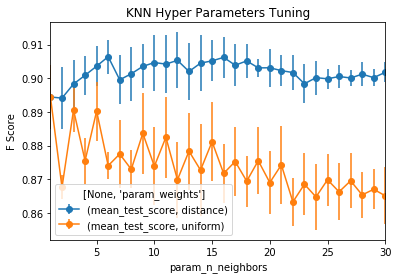

In [73]:
plot_results(grid_knn ,par_1 = "n_neighbors",par_2 = "weights", title = "KNN Hyper Parameters Tuning", y_lab= "F Score")


In [74]:
grid_knn.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [75]:
knn_final = KNeighborsClassifier(**grid_knn.best_params_)
knn_final.fit(x_train, y_train)


y_pred_k = knn_final.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred_knn)

0.9659448838334468

Deep Neural Network

In [40]:
# Neural Network 
def neural_net():
    model = Sequential()
    model.add(Dense(40, input_dim = 54, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(30, kernel_initializer= 'normal',activation = 'relu'))
    model.add(Dense(10, kernel_initializer= 'normal',activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
    return model



In [41]:
neural_net = KerasRegressor(build_fn = neural_net, epochs = 100, batch_size = 100, verbose = 0)
neural_net.fit(x_train, y_train)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [43]:
y_pred_net = neural_net.predict(x_test)

roc_auc_score(y_test,y_pred_net)

0.973989652142145

Ensemble Method: Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor 
  
spam_log = spam_data.copy()
spam_log.drop(columns = ['word_freq_direct','word_freq_415','word_freq_telnet'], inplace = True)
spam_data_y = spam_log.iloc[:,54].values
spam_data_x = spam_log.iloc[:,0:54].values
x_train,x_test,y_train,y_test = train_test_split(spam_data_x, spam_data_y, test_size = 0.2, 
                                                 random_state = 123,stratify = spam_data_y)
normalise = StandardScaler()
normalise.fit(x_train)
x_train = normalise.transform(x_train)
x_test = normalise.transform(x_test)

 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [46]:
from sklearn.metrics import roc_auc_score

y_pred = regressor.predict(x_test)
roc_auc_score(y_test, y_pred)

0.9748264660288121

For this part of the problem, we define a function that gives a misclassification cost for every predictive model

In [49]:
def misclass_cost(y_test, y_pred):
    diff = y_test - y_pred
    cost = np.where(diff == 1, 1, np.where(diff == -1, 10, 0))
    return np.sum(cost) * -1

from sklearn.metrics.scorer import make_scorer

cost_func = make_scorer(misclass_cost, greater_is_better=False)

Decision Tree

For every model, I used the defined function and compare the misclassification cost with other models to see which one
optimizes or has a lower cost when predicting emails as spam or not spam

In [50]:
grid_dt=GridSearchCV(tree,param_grid=depth , cv=4, scoring= cost_func)
grid_dt.fit(x_train,y_train) 
dt_result =pd.DataFrame(grid_dt.cv_results_)
grid_dt.best_params_

{'max_depth': 1, 'min_samples_leaf': 10}

In [68]:
roc_auc_score(y_test,y_pred_dt)
misclass_cost(y_test, y_pred_dt)

-138

In [69]:
from sklearn.metrics import confusion_matrix
y_pred_dt = dec_tree.predict(x_test)
confusion_matrix(y_test, y_pred_dt)

array([[528,  30],
       [ 59, 304]], dtype=int64)

Logistic Regression

In [51]:
grid_log=GridSearchCV(log,param_grid=c_vals , cv=4, scoring= cost_func)
grid_log.fit(x_train,y_train) 
log_result =pd.DataFrame(grid_log.cv_results_)
grid_log.best_params_

{'C': 0.001}

In [60]:
roc_auc_score(y_test,y_pred_logistic)
misclass_cost(y_test, y_pred_logistic)

-291

In [59]:
from sklearn.metrics import confusion_matrix
y_pred_logistic = finallog.predict(x_test)
confusion_matrix(y_test, y_pred_logistic)

array([[533,  25],
       [ 41, 322]], dtype=int64)

KNN

In [54]:
grid_knn = GridSearchCV(knn, param_grid, cv = 4, scoring = cost_func)
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(misclass_cost, greater_is_better=False),
             verbose=0)

In [55]:
roc_auc_score(y_test,y_pred_knn)
misclass_cost(y_test, y_pred_knn)

-49

In [70]:
from sklearn.metrics import confusion_matrix
y_pred_k = knn_final.predict(x_test)
confusion_matrix(y_test, y_pred_k)

array([[529,  29],
       [ 43, 320]], dtype=int64)

Neural Network

In [53]:
y_pred_net = neural_net.predict(x_test)

roc_auc_score(y_test,y_pred_net)
misclass_cost(y_test, y_pred_net)

-32

Given the above misclassification cost function, we have the following costs for each model:
- Decision Tree (-138)
- Logistic Regression (-291)
- KNN (-49)
- Neural Network (-32)

We can see from the information above that Neural Network has the lowest misclassification cost, which would be a better choice 
in reducing cost and thus, consistent with the given business requirement of classifying spam and non spam emails.